In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
import shap
import seaborn as sns

d:\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
d:\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('C:/Users/lai_h/Documents/GitHub/Capstone-Private-/dataset/edstays3_for_TLv_SMOTE.csv')

In [3]:
df.shape

(174134, 30)

In [4]:
df.head()

,Unnamed: 0,gender,race,arrival_transport,disposition,disposition_binary,admitted,difftime,nights,hours,...,acuity,chiefcomplaint,last_temperature,last_heartrate,last_resprate,last_o2sat,last_sbp,last_dbp,last_rhythm,last_pain
0,0,F,WHITE,AMBULANCE,ADMITTED,0,1,0 days 04:13:00,0,4.2,...,3.0,"Abd pain, Abdominal distention",98.2,85.0,18.0,98.0,81.0,38.0,NaN,0.0
1,1,F,WHITE,AMBULANCE,ADMITTED,0,1,0 days 05:37:00,0,5.6,...,3.0,Abdominal distention,97.7,79.0,16.0,98.0,107.0,60.0,NaN,0.0
2,2,F,WHITE,AMBULANCE,ADMITTED,0,1,30 days 04:46:00,30,724.8,...,3.0,"n/v/d, Abd pain",98.1,91.0,18.0,99.0,98.0,60.0,NaN,0.0
3,4,F,WHITE,AMBULANCE,ADMITTED,0,1,0 days 08:06:00,0,8.1,...,2.0,"Abdominal distention, Abd pain, LETHAGIC",98.1,96.0,18.0,97.0,86.0,45.0,NaN,0.0
4,5,M,WHITE,WALK IN,ADMITTED,0,1,0 days 06:44:00,0,6.7,...,2.0,"Confusion, Hallucinations",98.0,68.0,16.0,96.0,103.0,74.0,NaN,0.0


In [5]:
df = df.drop(['chiefcomplaint', "last_rhythm", "difftime", "disposition", "Unnamed: 0", "admitted"], axis=1)
df.head()

,gender,race,arrival_transport,disposition_binary,nights,hours,admission_hour,admission_day,admission_day_of_week,temperature,...,dbp,pain,acuity,last_temperature,last_heartrate,last_resprate,last_o2sat,last_sbp,last_dbp,last_pain
0,F,WHITE,AMBULANCE,0,0,4.2,19,5,0,98.4,...,63.0,0,3.0,98.2,85.0,18.0,98.0,81.0,38.0,0.0
1,F,WHITE,AMBULANCE,0,0,5.6,15,26,0,98.9,...,88.0,10,3.0,97.7,79.0,16.0,98.0,107.0,60.0,0.0
2,F,WHITE,AMBULANCE,0,30,724.8,20,8,0,99.4,...,57.0,10,3.0,98.1,91.0,18.0,99.0,98.0,60.0,0.0
3,F,WHITE,AMBULANCE,0,0,8.1,5,23,6,98.7,...,50.0,1,2.0,98.1,96.0,18.0,97.0,86.0,45.0,0.0
4,M,WHITE,WALK IN,0,0,6.7,20,20,3,97.5,...,71.0,0,2.0,98.0,68.0,16.0,96.0,103.0,74.0,0.0


In [6]:
df.columns

Index(['gender', 'race', 'arrival_transport', 'disposition_binary', 'nights',
       'hours', 'admission_hour', 'admission_day', 'admission_day_of_week',
       'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain',
       'acuity', 'last_temperature', 'last_heartrate', 'last_resprate',
       'last_o2sat', 'last_sbp', 'last_dbp', 'last_pain'],
      dtype='object')

In [7]:
df.disposition_binary.value_counts()

0    173739
1       395
Name: disposition_binary, dtype: int64

In [8]:
df.isnull().sum()

gender                   0
race                     0
arrival_transport        0
disposition_binary       0
nights                   0
hours                    0
admission_hour           0
admission_day            0
admission_day_of_week    0
temperature              0
heartrate                0
resprate                 0
o2sat                    0
sbp                      0
dbp                      0
pain                     0
acuity                   0
last_temperature         0
last_heartrate           0
last_resprate            0
last_o2sat               0
last_sbp                 0
last_dbp                 0
last_pain                0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174134 entries, 0 to 174133
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   gender                 174134 non-null  object 
 1   race                   174134 non-null  object 
 2   arrival_transport      174134 non-null  object 
 3   disposition_binary     174134 non-null  int64  
 4   nights                 174134 non-null  int64  
 5   hours                  174134 non-null  float64
 6   admission_hour         174134 non-null  int64  
 7   admission_day          174134 non-null  int64  
 8   admission_day_of_week  174134 non-null  int64  
 9   temperature            174134 non-null  float64
 10  heartrate              174134 non-null  float64
 11  resprate               174134 non-null  float64
 12  o2sat                  174134 non-null  float64
 13  sbp                    174134 non-null  float64
 14  dbp                    174134 non-nu

In [10]:
# data split
X = df.drop('disposition_binary', axis=1)
y = df['disposition_binary']

# apply encoding to categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False)

# X['admitted'] = X['admitted'].astype('bool')

# select the columns to scale 
columns_to_scale = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
columns_to_encode = ["race", "gender", "arrival_transport"]

# apply the scaler to the selected columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# apply the encoder to the selected columns 
X = pd.get_dummies(X, columns=columns_to_encode)

In [11]:
# apply SMOTE to balance the data
sm = SMOTE(sampling_strategy = 0.01, k_neighbors = 5, random_state = 100)
X_res, y_res = sm.fit_resample(X, y)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174134 entries, 0 to 174133
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   nights                        174134 non-null  float64
 1   hours                         174134 non-null  float64
 2   admission_hour                174134 non-null  float64
 3   admission_day                 174134 non-null  float64
 4   admission_day_of_week         174134 non-null  float64
 5   temperature                   174134 non-null  float64
 6   heartrate                     174134 non-null  float64
 7   resprate                      174134 non-null  float64
 8   o2sat                         174134 non-null  float64
 9   sbp                           174134 non-null  float64
 10  dbp                           174134 non-null  float64
 11  pain                          174134 non-null  float64
 12  acuity                        174134 non-nul

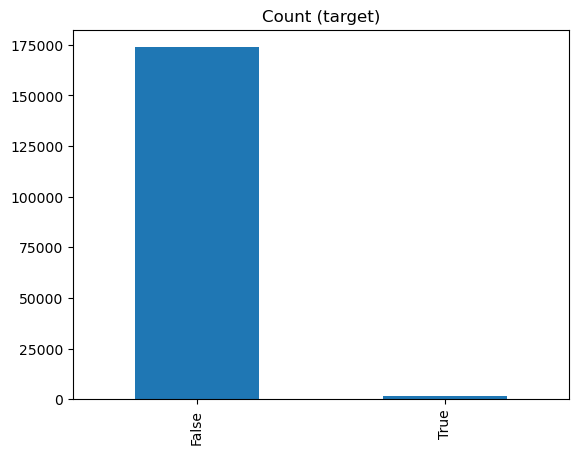

In [13]:
# plot the distribution of the target variable
# binary classification
y_res = y_res.astype('bool')
y_res.value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [14]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

## Baseline Model - Dummy Classifier

In [15]:
# create a dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
# fit the dummy classifier
dummy_clf.fit(X_train, y_train)

# predict the test set
y_pred = dummy_clf.predict(X_test)
# print the classification_report
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

       False     0.9899    1.0000    0.9949     52111
        True     0.0000    0.0000    0.0000       532

    accuracy                         0.9899     52643
   macro avg     0.4949    0.5000    0.4975     52643
weighted avg     0.9799    0.9899    0.9849     52643



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## Decision Tree & Random Forest Model

In [16]:
dtc = DecisionTreeClassifier(random_state=42)
# param_dict = {"criterion": ["gini", "entropy"], "max_depth": range(1, 5), "min_samples_split": range(2, 5),
#               "min_samples_leaf": range(1, 5)}
# # grid search for the best parameters (small grid for testing first)
# grid = GridSearchCV(dtc, param_grid=param_dict, cv=5, n_jobs=-1, verbose=1)
# grid.fit(X_train, y_train)

# # print the best parameters
# print(grid.best_params_)
# # print the best score
# print(grid.best_score_)

dtc.fit(X_train, y_train)
# # predict the test set
y_pred = dtc.predict(X_test)
# print the classification_report
print(classification_report(y_test, y_pred, digits=4))
# balanced accuracy score
print(balanced_accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False     0.9964    0.9960    0.9962     52111
        True     0.6191    0.6447    0.6317       532

    accuracy                         0.9924     52643
   macro avg     0.8078    0.8203    0.8139     52643
weighted avg     0.9926    0.9924    0.9925     52643

0.8203438964800845


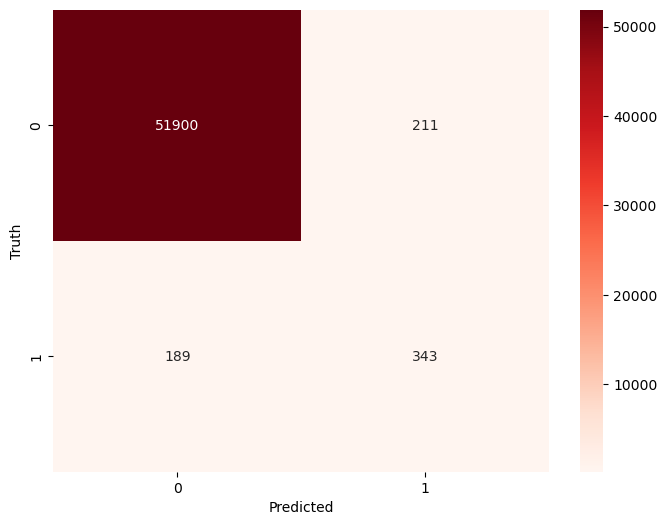

In [17]:
import seaborn as sns
# import confusion matrix
from sklearn.metrics import confusion_matrix
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
#
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [18]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
# param_dict = {"n_estimators": [100, 200, 300], "max_depth": range(1, 5), "min_samples_split": range(2, 5)}

# # grid search for the best parameters (small grid for testing first)
# grid_rfr = GridSearchCV(rfc, param_grid=param_dict, cv=5, n_jobs=-1, verbose=1)
# grid_rfr.fit(X_train, y_train)

# #print the best parameters
# print(grid_rfr.best_params_)
# # print the best score
# print(grid_rfr.best_score_)

# # predict the test set
# y_pred = grid_rfr.predict(X_test)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# print the classification_report
print(classification_report(y_test, y_pred, digits=4))
print(balanced_accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False     0.9954    0.9993    0.9973     52111
        True     0.8892    0.5432    0.6744       532

    accuracy                         0.9947     52643
   macro avg     0.9423    0.7713    0.8359     52643
weighted avg     0.9943    0.9947    0.9941     52643

0.7712711248386361


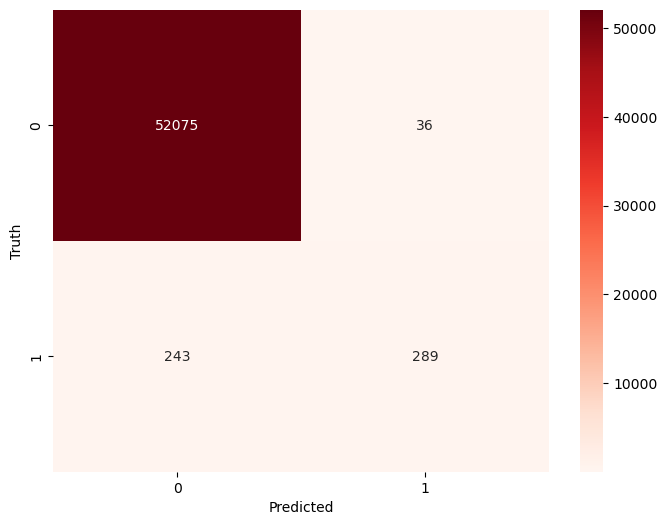

In [19]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
#
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

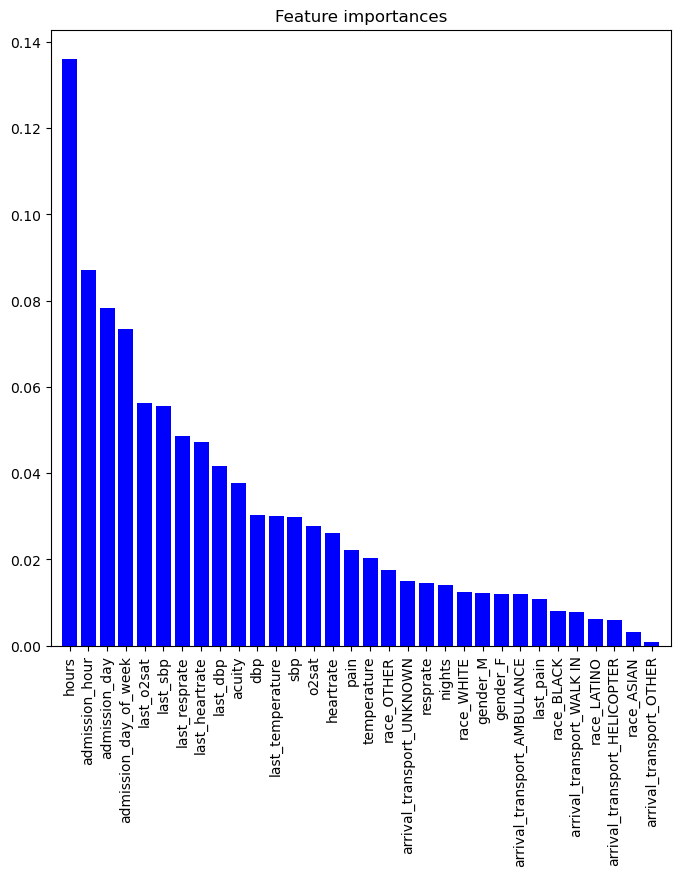

In [20]:
# plot the feature importance 
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# XGBoost

In [21]:
## Import XGBoost 

xgbc = XGBClassifier(random_state=42)

# grid search for XGBoost
param_dict = {"n_estimators": [100, 200, 300], "max_depth": range(1, 5), "min_samples_split": range(2, 5)}
grid_xgbc = GridSearchCV(xgbc, param_grid=param_dict, cv=5, n_jobs=-1, verbose=1)
grid_xgbc.fit(X_train, y_train)



# print the best parameters
print(grid_xgbc.best_params_)
# print the best score
print(grid_xgbc.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[17:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 300}
0.9972075892022076


In [33]:
# best parameters = {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 300}
xgbc = XGBClassifier(max_depth=4, min_samples_split=2, n_estimators=300, random_state=42)
xgbc.fit(X_train, y_train)

# predict the test set
y_pred = xgbc.predict(X_test)

# xgbc.fit(X_train, y_train) 
# y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[17:24:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False     0.9974    0.9997    0.9985     52111
        True     0.9566    0.7462    0.8384       532

    accuracy                         0.9971     52643
   macro avg     0.9770    0.8729    0.9185     52643
weighted avg     0.99

In [34]:
from sklearn.metrics import balanced_accuracy_score
# print the balanced accuracy score
print(balanced_accuracy_score(y_test, y_pred))

0.872947592494506


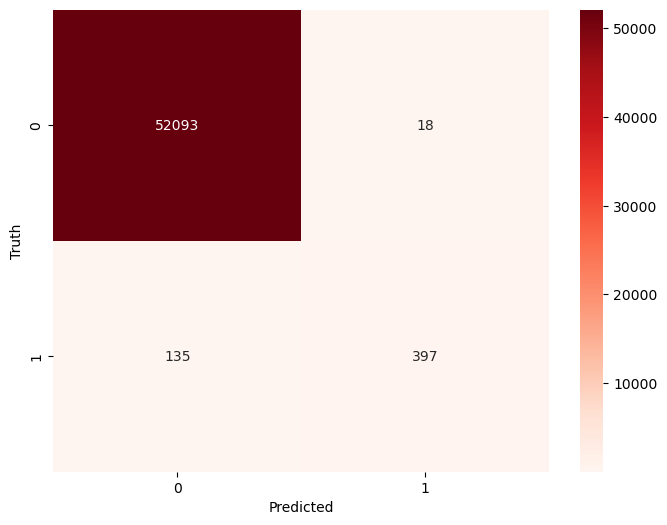

In [35]:
import seaborn as sns
# import confusion matrix
from sklearn.metrics import confusion_matrix
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
#
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [36]:
explainer = shap.Explainer(xgbc)
shap_values = explainer(X_res)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


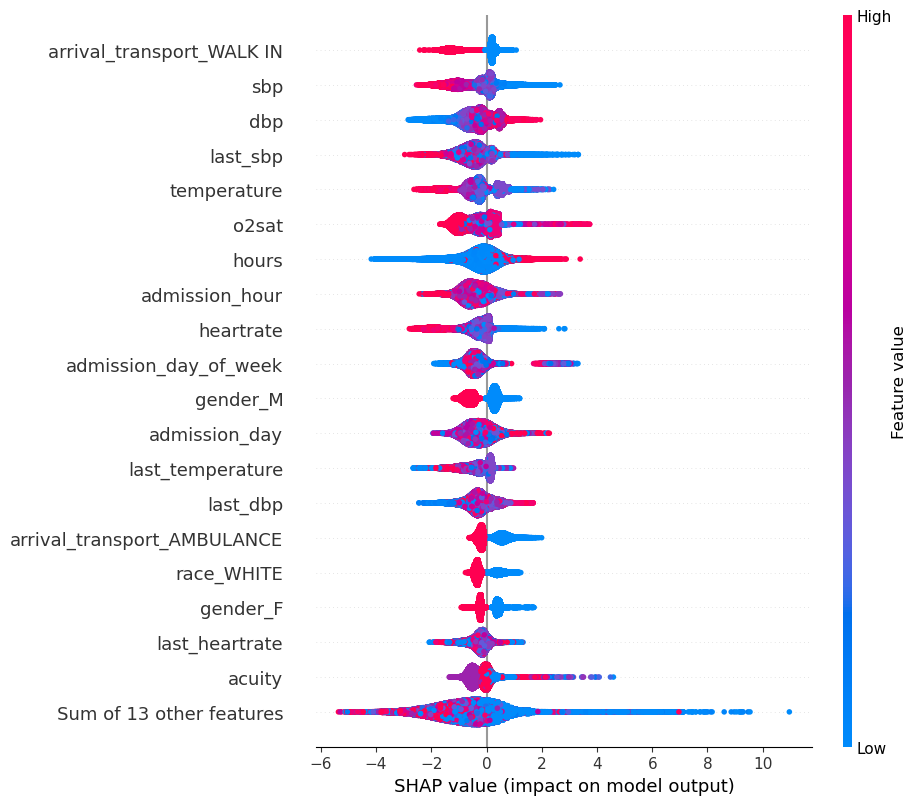

In [37]:
shap.plots.beeswarm(shap_values, max_display=20)

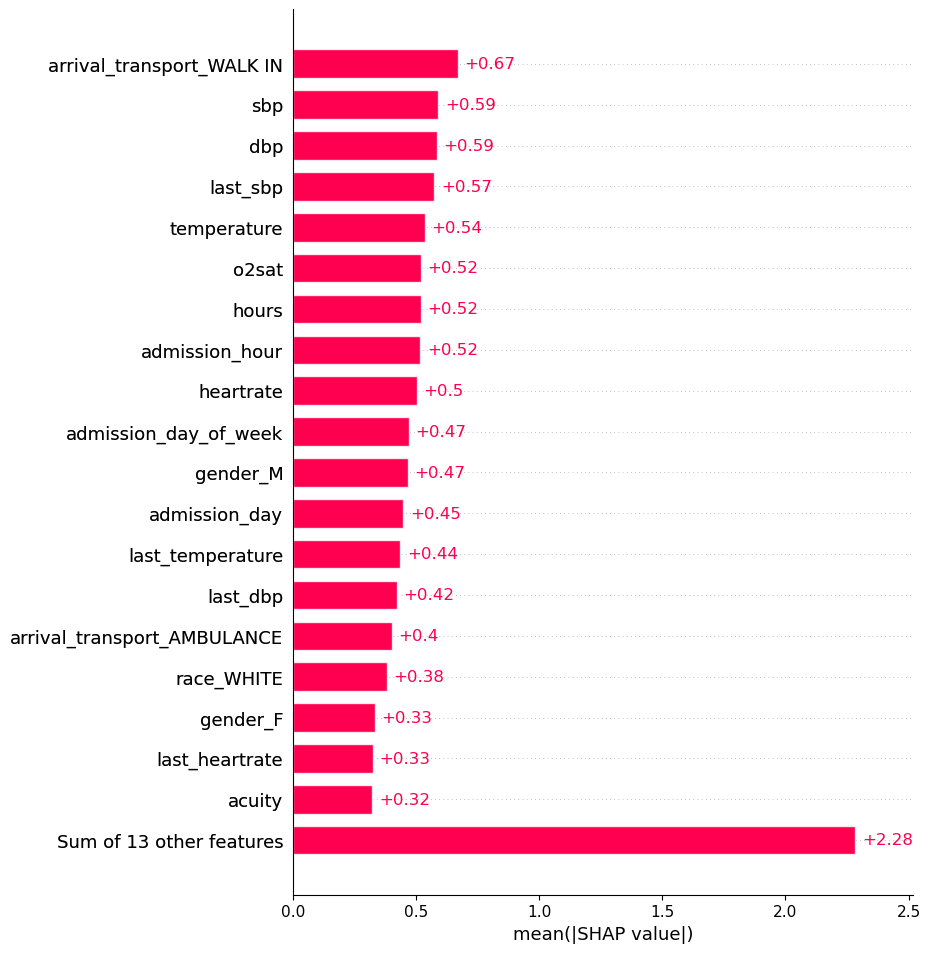

In [38]:
# shap summary bar plot
shap.plots.bar(shap_values, max_display=20)

# Look at the feature importance of expired patients

In [39]:
# located the row number of expired patients in the test set
expired_index = y_res[y_res == 1].index 
expired_index

Int64Index([   553,    669,    672,    995,   1322,   1498,   1531,   1852,
              2397,   3971,
            ...
            175466, 175467, 175468, 175469, 175470, 175471, 175472, 175473,
            175474, 175475],
           dtype='int64', length=1737)

In [40]:
y_res[553]

True

## Expired patients feature importance plot 1 (row 553)

In [41]:
shap.initjs()
# row 553
shap.force_plot(explainer.expected_value, shap_values.values[553,:],X_res.iloc[553,:])

## Expired patients feature importance plot 2 (row 3391)

In [42]:
# row 3971
shap.force_plot(explainer.expected_value, shap_values.values[3971,:],X_res.iloc[3971,:])

## Non-Expired patients feature importance plot 2 (row 0)

In [43]:
shap.force_plot(explainer.expected_value, shap_values.values[0,:],X_res.iloc[0,:])